# UK Road Safety – Accident Severity Analysis

### Project Goals
1. Analyse where, when, and why accidents happen in the UK  
2. Identify key factors influencing accident severity  
3. Develop a predictive machine learning model that classifies accidents as **Slight** or **Severe**

### Notebook Scope
This notebook includes the main analytical steps - data cleaning, transformation, feature engineering, and initial modeling - supporting all project objectives.
   
### How to Reproduce

To replicate this analysis:
1. Download the dataset from [Kaggle](https://www.kaggle.com/datasets/tsiaras/uk-road-safety-accidents-and-vehicles).  
2. Place the file `Accident_Information.csv` in the `data/` directory.  
3. Run this notebook from start to finish using Python ≥3.10 and the following libraries:
   - pandas, numpy, matplotlib, seaborn, scikit-learn  
4. All random seeds are fixed for reproducibility.



### License and Acknowledgment

Data source: UK Department for Transport (Open Government License).  
This project is developed for academic purposes as part of the Intoduction to Data Science course at Tartu University



## Data Cleaning

### 1. Importing Libraries

We start by importing the required Python libraries for data loading, analysis, and visualization.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


### 2. Load dataset and inspect

The dataset used for this analysis is `Accident_Information.csv`, published by the UK Department for Transport.
We first load it into a pandas DataFrame and inspect its structure.

In [2]:
# Load dataset
df = pd.read_csv("Accident_Information.csv")

# Preview
df.head()

/tmp/ipykernel_70593/1509846393.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Accident_Information.csv")


,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,NaN,0.0,Serious,NaN,2005-01-04,Tuesday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,NaN,30.0,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,NaN,2005-01-05,Wednesday,1.0,...,Metropolitan Police,Dry,Dual carriageway,NaN,30.0,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,NaN,0.0,Slight,NaN,2005-01-06,Thursday,1.0,...,Metropolitan Police,Dry,Single carriageway,NaN,30.0,00:15,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220.0,NaN,0.0,Slight,NaN,2005-01-07,Friday,1.0,...,Metropolitan Police,Dry,Single carriageway,NaN,30.0,10:35,Urban,Fine no high winds,2005,No
4,200501BS00005,Unclassified,0.0,NaN,0.0,Slight,NaN,2005-01-10,Monday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,NaN,30.0,21:13,Urban,Fine no high winds,2005,No


### 3. Identify and describe key variables


After loading the dataset, we review its structure and identify the most relevant variables for our analysis and modeling tasks.  

The dataset `Accident_Information.csv` contains 34 variables and around 2 million records.  
Each row represents one road accident reported in the United Kingdom.  
The table below lists the **12 key variables** most relevant for analysis and modeling.

| Variable | Description | Type | Measurement Level |
|-----------|--------------|------|-------------------|
| Accident_Index | Unique identifier for each accident | object | ID |
| Date | Date of the accident | datetime | Temporal |
| Time | Time of day (HH:MM) | object | Temporal |
| Day_of_Week | Day when the accident occurred | object | Ordinal |
| Year | Year of the accident | int | Temporal |
| Weather_Conditions | Weather during the accident | object | Nominal |
| Light_Conditions | Lighting at the time of the accident | object | Nominal |
| Road_Surface_Conditions | Condition of the road surface | object | Nominal |
| Urban_or_Rural_Area | Whether the area is urban or rural | object | Nominal |
| Speed_limit | Legal speed limit at the location (mph) | float | Ratio |
| Number_of_Vehicles | Number of vehicles involved | float | Ratio |
| Accident_Severity | Severity level (Slight / Serious / Fatal) | object | Ordinal (Target) |

These selected features form the foundation for both the descriptive exploration and predictive modeling stages of this project.
They provide the necessary information to understand **when, where, and under what conditions** accidents occur, and how these factors may influence their severity.



### 4. Data Preprocessing

After inspecting the dataset, the next step is to prepare it for analysis by filtering and cleaning the data.  
This involves converting data types, removing duplicates, validating numeric ranges, and keeping only records that fall within valid geographic and temporal boundaries.

The following preprocessing steps were performed:
1. Converted the `Date` column to a datetime format.  
2. Filtered the dataset to include only accidents that occurred between **2012–2017**, representing the most recent and consistent time period.  
3. Removed duplicate records based on the unique accident identifier `Accident_Index`.  
4. Excluded rows with unrealistic or invalid numeric values (e.g., `Speed_limit`, `Number_of_Vehicles`, `Number_of_Casualties`).  
5. Retained only records with valid **UK latitude and longitude** coordinates.
6. **Ordinal encoding** was applied to Accident_Severity, while other categorical features will be one-hot encoded during model preparation.

Each of these steps improves the quality and reliability of the dataset, ensuring that subsequent analysis and modeling are based on accurate and consistent data.

In [3]:
# Check size and data types
df.info()

# Number of rows and columns
print("Rows:", df.shape[0], "Columns:", df.shape[1])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2047256 entries, 0 to 2047255
Data columns (total 34 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   Accident_Index                               object 
 1   1st_Road_Class                               object 
 2   1st_Road_Number                              float64
 3   2nd_Road_Class                               object 
 4   2nd_Road_Number                              float64
 5   Accident_Severity                            object 
 6   Carriageway_Hazards                          object 
 7   Date                                         object 
 8   Day_of_Week                                  object 
 9   Did_Police_Officer_Attend_Scene_of_Accident  float64
 10  Junction_Control                             object 
 11  Junction_Detail                              object 
 12  Latitude                                     float64
 13  Light_Condit

In [4]:
# Convert Date column to datetime
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Filter accidents from 2012 to 2017
df = df[(df["Date"].dt.year >= 2012) & (df["Date"].dt.year <= 2017)]

print("Filtered dataset:", df.shape)


Filtered dataset: (837212, 34)


In [5]:
# Remove duplicates based on Accident_Index
df = df.drop_duplicates(subset="Accident_Index", keep="first")
print("After removing duplicates:", df.shape)


After removing duplicates: (837212, 34)


In [6]:
# Remove records with invalid numeric ranges
df = df[
    (df["Number_of_Vehicles"] > 0) &
    (df["Number_of_Casualties"] >= 0) &
    (df["Speed_limit"].between(20, 70))  # valid UK road limits
]

print("After numeric validation:", df.shape)


After numeric validation: (837171, 34)


In [7]:
# Keep records with valid UK latitude/longitude
df = df[
    df["Longitude"].between(-10, 2) &
    df["Latitude"].between(49, 60)
]

print("After coordinate check:", df.shape)


After coordinate check: (836974, 34)


In [8]:
# Encode accident severity levels as ordered numeric values 
# (0 = Slight, 1 = Serious, 2 = Fatal) for easier analysis and modeling
severity_map = {"Slight": 0, "Serious": 1, "Fatal": 2}
df["Accident_Severity"] = df["Accident_Severity"].map(severity_map)

### 5. Verify Data Availability

Before proceeding to deeper exploration, several validation checks were performed to ensure that the dataset is complete, consistent, and correctly structured.

- **Missing values:**  
  The majority of variables are fully populated, with only a few columns (e.g., `2nd_Road_Class` ≈ 40% and `Carriageway_Hazards` ≈ 98%) showing missing or undefined values.  
  These attributes are non-critical for the project goals and will be handled or excluded later.

- **Unique category inspection:**  
  Key categorical variables such as `Weather_Conditions`, `Light_Conditions`, and `Road_Surface_Conditions` were examined to confirm that all categories are valid and interpretable.  
  No irregular or duplicate category labels were found.

- **Numeric and temporal checks:**  
  The ranges of numeric attributes (`Speed_limit`, `Number_of_Vehicles`, `Number_of_Casualties`) are realistic and within legal UK limits.  
  Date values span from **2012 to 2017**, confirming the expected data period.  

- **Spatial validation:**  
  Latitude and longitude values fall entirely within the UK boundaries (49–60° N, −10–2° E), ensuring spatial consistency.

- **Target variable distribution:**  
  The accident severity variable is imbalanced, with **83.8% Slight**, **15.0% Serious**, and **1.2% Fatal** cases.  
  This imbalance will need to be addressed later during model training (e.g., resampling or weighting).

Overall, the dataset passes essential quality checks and can be considered reliable for exploratory and predictive analysis.

In [9]:
# Count missing values in each column
missing = df.isna().sum().sort_values(ascending=False)

# Calculate percentage of missing data
missing_percent = (df.isna().sum() / len(df) * 100).round(2)

# Combine results
missing_summary = pd.DataFrame({
    'Missing Values': missing,
    'Percent': missing_percent
})

missing_summary.head(10)


,Missing Values,Percent
1st_Road_Class,0,0.00
1st_Road_Number,0,0.00
2nd_Road_Class,338534,40.45
2nd_Road_Number,4797,0.57
Accident_Index,0,0.00
Accident_Severity,0,0.00
Carriageway_Hazards,820125,97.99
Date,0,0.00
Day_of_Week,0,0.00
Did_Police_Officer_Attend_Scene_of_Accident,9,0.00


In [10]:
# Check missing values
df.isna().sum().sort_values(ascending=False).head(10)

# Check unique values for key categorical columns
for col in ["Weather_Conditions", "Light_Conditions", "Road_Surface_Conditions", "Urban_or_Rural_Area", "Accident_Severity"]:
    print(f"\n{col}:\n", df[col].value_counts(dropna=False).head())




Weather_Conditions:
 Weather_Conditions
Fine no high winds       676639
Raining no high winds     96669
Unknown                   18531
Other                     14582
Raining + high winds      11509
Name: count, dtype: int64

Light_Conditions:
 Light_Conditions
Daylight                       610314
Darkness - lights lit          165452
Darkness - no lighting          42985
Darkness - lighting unknown     13297
Darkness - lights unlit          4916
Name: count, dtype: int64

Road_Surface_Conditions:
 Road_Surface_Conditions
Dry                             589271
Wet or damp                     225679
Frost or ice                     13175
Snow                              3890
Data missing or out of range      3725
Name: count, dtype: int64

Urban_or_Rural_Area:
 Urban_or_Rural_Area
Urban          549601
Rural          287372
Unallocated         1
Name: count, dtype: int64

Accident_Severity:
 Accident_Severity
0    701627
1    125463
2      9884
Name: count, dtype: int64


In [11]:
# Quick check for unusual or extreme values
df[["Speed_limit", "Number_of_Vehicles", "Number_of_Casualties"]].describe()


,Speed_limit,Number_of_Vehicles,Number_of_Casualties
count,836974.000000,836974.000000,836974.000000
mean,38.119177,1.835425,1.328721
std,13.938354,0.711949,0.803885
min,20.000000,1.000000,1.000000
25%,30.000000,1.000000,1.000000
50%,30.000000,2.000000,1.000000
75%,40.000000,2.000000,1.000000
max,70.000000,67.000000,93.000000


In [12]:
# Check date parsing and year coverage
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
print("Years range:", df["Date"].dt.year.min(), "-", df["Date"].dt.year.max())

# Count number of records per year
df["Year"].value_counts().sort_index()


Years range: 2012 - 2017


Year
2012    145544
2013    138637
2014    146298
2015    140002
2016    136555
2017    129938
Name: count, dtype: int64

In [13]:
# Check if coordinates are within UK bounds
valid_lat = df["Latitude"].between(49, 60).mean() * 100
valid_lon = df["Longitude"].between(-10, 2).mean() * 100
print(f"Valid Latitude values: {valid_lat:.2f}%")
print(f"Valid Longitude values: {valid_lon:.2f}%")


Valid Latitude values: 100.00%
Valid Longitude values: 100.00%


In [14]:
# Distribution of target variable
df["Accident_Severity"].value_counts(normalize=True).mul(100).round(2)


Accident_Severity
0    83.83
1    14.99
2     1.18
Name: proportion, dtype: float64

### 6. Exploring Data

This section explores the main temporal, environmental, and spatial patterns in the dataset to better understand when, where, and under what conditions road accidents occur in the United Kingdom.
The analysis combines descriptive statistics and visualizations to reveal trends in accident frequency, severity, and contributing factors such as time of day, weather, lighting, and speed limits.
These insights provide the foundation for selecting features in the upcoming modeling stage.

In [15]:
# Basic style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("crest")


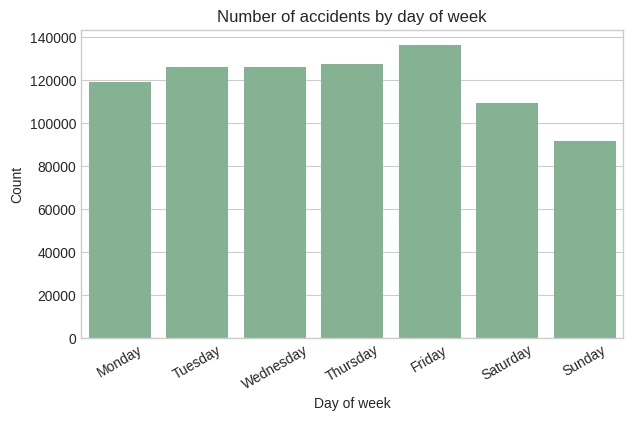

/tmp/ipykernel_70593/1716535113.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Hour"] = pd.to_datetime(df["Time"], errors="coerce").dt.hour


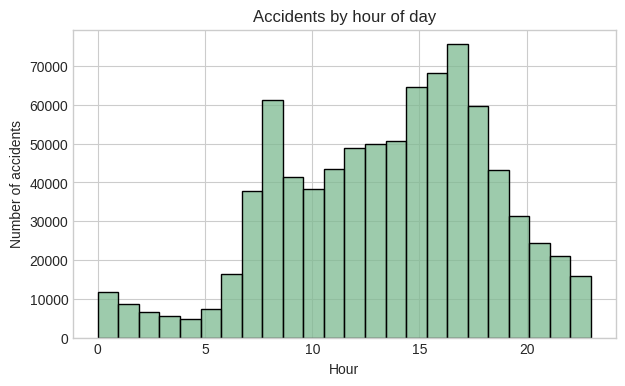

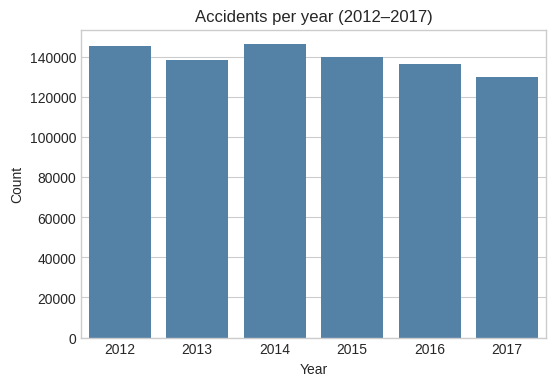

In [16]:
# Accidents by day of week
plt.figure(figsize=(7,4))
order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
sns.countplot(data=df, x="Day_of_Week", order=order)
plt.title("Number of accidents by day of week")
plt.xlabel("Day of week")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.show()

# Accidents by hour
df["Hour"] = pd.to_datetime(df["Time"], errors="coerce").dt.hour
plt.figure(figsize=(7,4))
sns.histplot(df["Hour"].dropna(), bins=24, kde=False)
plt.title("Accidents by hour of day")
plt.xlabel("Hour")
plt.ylabel("Number of accidents")
plt.show()

# Accidents by year
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Year", color="steelblue")
plt.title("Accidents per year (2012–2017)")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


**Number of Accidents by Day of Week**   
The distribution shows a clear weekly pattern.  
Accident counts gradually increase towards the end of the week, peaking on Friday, which likely reflects higher traffic volume and pre-weekend activity.  
The lowest number of accidents occurs on Sunday, when overall traffic density is reduced.  

**Number of Accidents by Hour of Day**  
The hourly distribution highlights two distinct peaks:
- one in the morning (8:00–9:00) and another in the afternoon (16:00–18:00), corresponding to daily commuting hours.   
   
This confirms that road congestion during rush hours is a major contributing factor to accident frequency.

**Number of Accidents by Year (2012–2017)**  
Annual data show a gradual decrease in accident counts over time.   
This trend may reflect improvements in vehicle safety, stricter enforcement of traffic laws, and awareness campaigns by the UK Department for Transport.    
Despite the decline, the large number of incidents indicates that road safety remains a relevant public concern.   

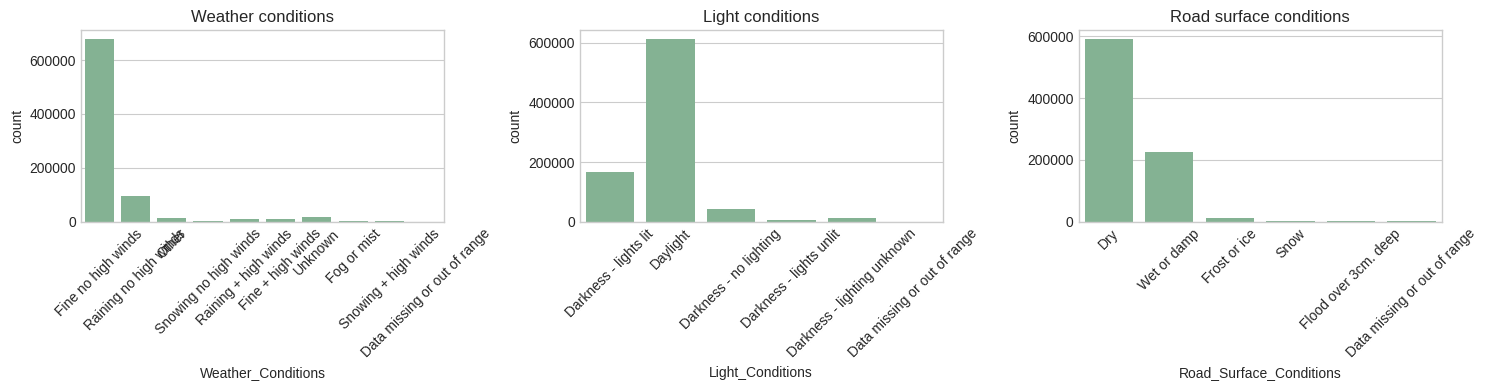

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))

sns.countplot(data=df, x="Weather_Conditions", ax=axes[0])
axes[0].set_title("Weather conditions")
axes[0].tick_params(axis='x', rotation=45)

sns.countplot(data=df, x="Light_Conditions", ax=axes[1])
axes[1].set_title("Light conditions")
axes[1].tick_params(axis='x', rotation=45)

sns.countplot(data=df, x="Road_Surface_Conditions", ax=axes[2])
axes[2].set_title("Road surface conditions")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


**Weather, Light, and Road Surface Conditions**  
These plots illustrate how environmental factors influence accidents:   
- Most accidents occur under clear and dry conditions, not extreme weather - suggesting that driver behavior, not just bad weather, plays a key role.
- Daylight conditions dominate, though a notable number occur in darkness with lighting, indicating that urban lighting reduces risk but does not eliminate it.
- Wet or damp roads are the second most common condition, reinforcing the importance of traction and braking control.

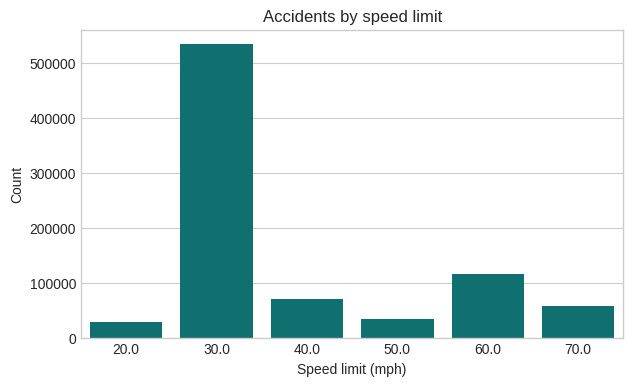

/tmp/ipykernel_70593/2826015394.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=df["Accident_Severity"].map(label_map), order=["Slight", "Severe", "Fatal"], palette="crest")


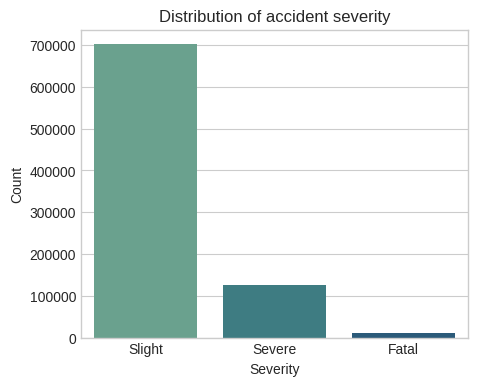

In [18]:
# Distribution of accidents by speed limit
plt.figure(figsize=(7,4))
sns.countplot(data=df, x="Speed_limit", color="teal")
plt.title("Accidents by speed limit")
plt.xlabel("Speed limit (mph)")
plt.ylabel("Count")
plt.show()

# Severity distribution
label_map = {0: "Slight", 1: "Severe", 2: "Fatal"}
plt.figure(figsize=(5,4))
sns.countplot(data=df, x=df["Accident_Severity"].map(label_map), order=["Slight", "Severe", "Fatal"], palette="crest")
plt.title("Distribution of accident severity")
plt.xlabel("Severity")
plt.ylabel("Count")
plt.show()


**Accidents by Speed Limit**  
The majority of recorded accidents happen on roads with a 30 mph speed limit, typical for urban and residential areas.  
This aligns with the earlier observation that accidents are concentrated in densely populated regions.  
Higher-speed roads (50–70 mph) show fewer accidents overall but potentially higher severity.  

**Distribution of Accident Severity**   
The severity distribution confirms a strong imbalance:
Slight accidents account for nearly 84%, while Serious and Fatal make up 15% and 1%, respectively.    
This reflects real-world proportions and will be addressed later during model training through resampling or class weighting.  

/tmp/ipykernel_70593/3935255639.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Accident_Severity", y="Speed_limit", palette="crest")


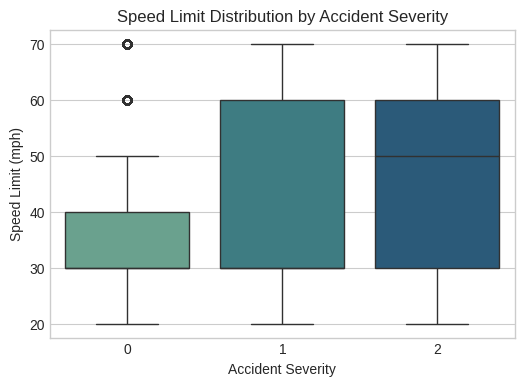

In [19]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="Accident_Severity", y="Speed_limit", palette="crest")
plt.title("Speed Limit Distribution by Accident Severity")
plt.xlabel("Accident Severity")
plt.ylabel("Speed Limit (mph)")
plt.show()


**Speed Limit Distribution by Accident Severity**   
This boxplot compares speed limits across different accident severity levels.    
The median speed limit increases slightly with severity, suggesting that serious and fatal accidents tend to occur on faster roads.  
However, the interquartile ranges overlap, indicating that speed limit alone is not the only determinant of accident severity.  

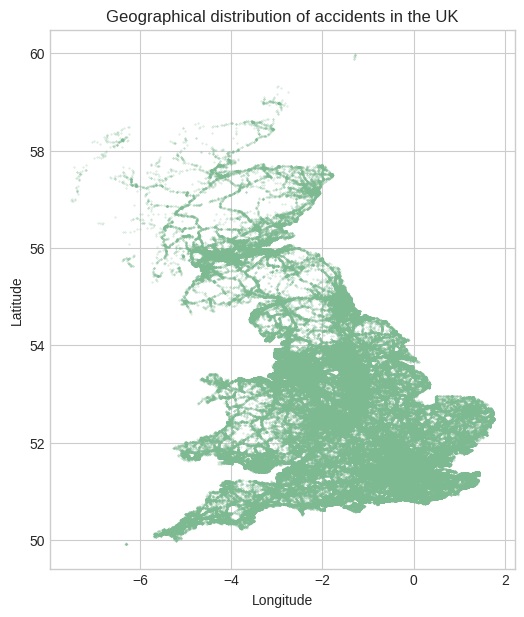

In [20]:
# Scatter plot of coordinates (quick visual check)
plt.figure(figsize=(6,7))
plt.scatter(df["Longitude"], df["Latitude"], s=0.1, alpha=0.5)
plt.title("Geographical distribution of accidents in the UK")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


**Geographical Distribution of Accidents in the UK**  
The scatter plot provides a geographical overview of all accident locations.   
Dense clusters are visible around major urban centers such as London, Birmingham, and Manchester, as well as along main highways.  
Rural regions show lower densities, consistent with lower traffic volumes.  

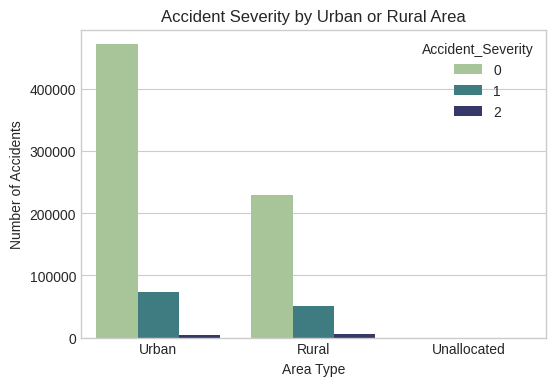

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Urban_or_Rural_Area", hue="Accident_Severity", palette="crest")
plt.title("Accident Severity by Urban or Rural Area")
plt.xlabel("Area Type")
plt.ylabel("Number of Accidents")
plt.show()


**Accident Severity by Urban or Rural Area**
This countplot shows that most accidents happen in urban areas, but the relative share of serious and fatal accidents is higher in rural zones.  
This pattern may be due to higher speeds, less lighting, and slower emergency response times outside cities.   

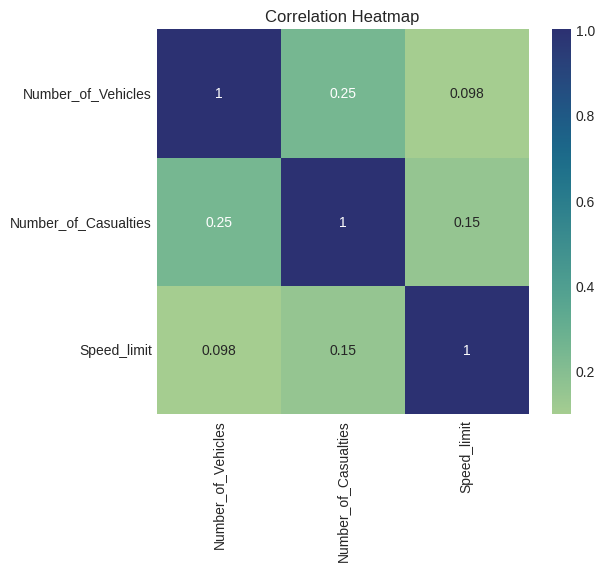

In [22]:
plt.figure(figsize=(6,5))
sns.heatmap(df[["Number_of_Vehicles", "Number_of_Casualties", "Speed_limit"]].corr(), annot=True, cmap="crest")
plt.title("Correlation Heatmap")
plt.show()


**Correlation Heatmap**  
The heatmap illustrates correlations between numeric variables.  
There is a moderate positive correlation (0.24) between the number of vehicles and casualties, meaning multi-vehicle collisions often result in more injuries.  
Speed limit, however, shows weak correlation, implying that severity depends more on situational and human factors than on road limits alone.  

/tmp/ipykernel_70593/423413713.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Hour"] = pd.to_datetime(df["Time"], errors="coerce").dt.hour
/tmp/ipykernel_70593/423413713.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Hour", y="Accident_Severity", palette="crest", scale="count")
/tmp/ipykernel_70593/423413713.py:3: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(data=df, x="Hour", y="Accident_Severity", palette="crest", scale="count")


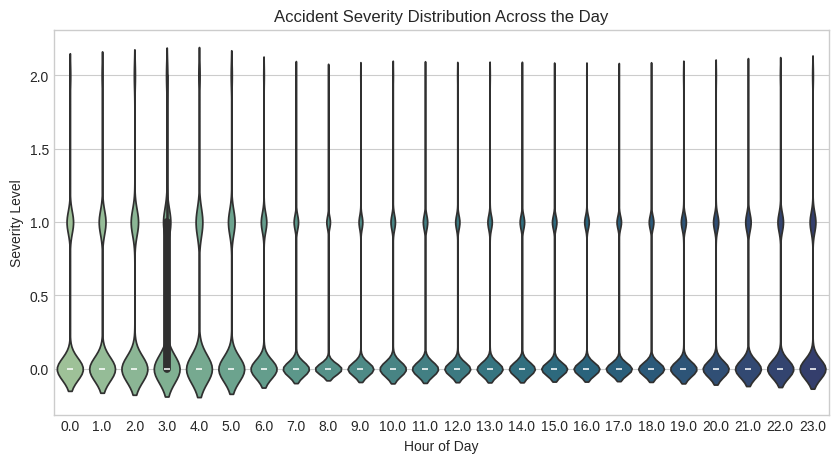

In [23]:
df["Hour"] = pd.to_datetime(df["Time"], errors="coerce").dt.hour
plt.figure(figsize=(10,5))
sns.violinplot(data=df, x="Hour", y="Accident_Severity", palette="crest", scale="count")
plt.title("Accident Severity Distribution Across the Day")
plt.xlabel("Hour of Day")
plt.ylabel("Severity Level")
plt.show()


**Accident Severity Distribution Across the Day**  
This violin plot visualizes how accident severity varies by hour of day.   
Accidents occur throughout the day, but the distribution widens during late evening and early morning hours, possibly reflecting lower visibility and driver fatigue.  
Overall, most accidents remain slight, but nighttime events show a heavier tail toward serious cases.  

# Data Preprocessing for Modeling (not annotated yet)

todo <br>
-categorical features will be one-hot encoded during model preparation. <br>
- use hour instead of time since minutes have too much variation
- use only month and year from date
- combine fatal and serious to one?



In [24]:
# 1. Map Accident_Severity (combine level 2 into 1)
df["Accident_Severity"] = df["Accident_Severity"].replace({2: 1})

# 2. Select relevant columns
columns_to_keep = [
    "Day_of_Week",
    "Weather_Conditions",
    "Light_Conditions",
    "Road_Surface_Conditions",
    "Urban_or_Rural_Area",
    "Speed_limit",
    "Number_of_Vehicles",
    "Accident_Severity",
    "Hour"
]

df_model = df[columns_to_keep].copy()  # copy() prevents SettingWithCopyWarning

# 3. Drop rows with missing Hour values
df_model = df_model.dropna(subset=["Hour"])

# 4. Bin hours into categorical time ranges and drop "Hour"
#bins = [0, 6, 10, 15, 18, 24]
#labels = ["Night", "Morning", "Midday", "Evening", "LateNight"]
#df_model["Hour_bin"] = pd.cut(df_model["Hour"], bins=bins, labels=labels, include_lowest=True)
#df_model.drop("Hour", axis=1, inplace=True)

# 5. Convert weekdays
weekend_days = ["Saturday", "Sunday"]
df_model["Weekday_or_Weekend"] = df_model["Day_of_Week"].apply(lambda x: 1 if x in weekend_days else 0)
df_model.drop("Day_of_Week", axis=1, inplace=True)

# Check the result
print(df_model[["Weekday_or_Weekend"]].head())



# 6. Reset index
df_model.reset_index(drop=True, inplace=True)

# 7. Check for missing values
print("Missing values in Accident_Severity:", df_model["Accident_Severity"].isna().sum())
print("Missing values in Hour_bin:", df_model["Hour_bin"].isna().sum())

df_model.head(10)


         Weekday_or_Weekend
1210044                   0
1210045                   0
1210046                   0
1210047                   0
1210048                   0
Missing values in Accident_Severity: 0
Missing values in Hour_bin: 0


,Weather_Conditions,Light_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Speed_limit,Number_of_Vehicles,Accident_Severity,Hour,Hour_bin,Weekday_or_Weekend
0,Fine no high winds,Darkness - lights lit,Dry,Urban,30.0,2,0,20.0,LateNight,0
1,Fine no high winds,Darkness - lights lit,Dry,Urban,30.0,2,0,17.0,Evening,0
2,Fine no high winds,Daylight,Dry,Urban,30.0,2,0,10.0,Morning,0
3,Fine no high winds,Daylight,Dry,Urban,30.0,1,0,12.0,Midday,0
4,Fine no high winds,Darkness - lights lit,Dry,Urban,30.0,1,0,20.0,LateNight,0
5,Raining no high winds,Darkness - lights lit,Wet or damp,Urban,30.0,2,0,7.0,Morning,0
6,Fine no high winds,Daylight,Dry,Urban,30.0,1,0,14.0,Midday,0
7,Fine no high winds,Daylight,Dry,Urban,30.0,2,0,11.0,Midday,1
8,Fine no high winds,Daylight,Dry,Urban,30.0,2,0,13.0,Midday,1
9,Raining no high winds,Darkness - lights lit,Wet or damp,Urban,30.0,2,0,19.0,LateNight,0


### One Hot Encoding

In [25]:
# numerical features
numerical_cols = ["Speed_limit","Weekday_or_Weekend","Number_of_Vehicles","Hour"]
numerical_df = df_model[numerical_cols]

# One-Hot-Encoding
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ["Weather_Conditions","Light_Conditions",
                    "Road_Surface_Conditions","Urban_or_Rural_Area"]

encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
encoded_data = encoder.fit_transform(df_model[categorical_cols])

encoded_df = pd.DataFrame(
    encoded_data,
    columns=encoder.get_feature_names_out(categorical_cols),
    index=df_model.index  
)

# Target 
target_series = df_model["Accident_Severity"].copy()

# Fatal + Serious 
target_series.replace({2:1}, inplace=True)

# NaNs
target_series = target_series.dropna()

numerical_df = numerical_df.loc[target_series.index]
encoded_df = encoded_df.loc[target_series.index]

# merge
df_model_encoded = pd.concat([numerical_df, encoded_df], axis=1)
df_model_encoded["Accident_Severity"] = target_series

print(df_model_encoded["Accident_Severity"].value_counts())
df_model_encoded.head(10)

Accident_Severity
0    701603
1    135335
Name: count, dtype: int64


,Speed_limit,Weekday_or_Weekend,Number_of_Vehicles,Hour,Weather_Conditions_Data missing or out of range,Weather_Conditions_Fine + high winds,Weather_Conditions_Fine no high winds,Weather_Conditions_Fog or mist,Weather_Conditions_Other,Weather_Conditions_Raining + high winds,...,Road_Surface_Conditions_Data missing or out of range,Road_Surface_Conditions_Dry,Road_Surface_Conditions_Flood over 3cm. deep,Road_Surface_Conditions_Frost or ice,Road_Surface_Conditions_Snow,Road_Surface_Conditions_Wet or damp,Urban_or_Rural_Area_Rural,Urban_or_Rural_Area_Unallocated,Urban_or_Rural_Area_Urban,Accident_Severity
0,30.0,0,2,20.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,30.0,0,2,17.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2,30.0,0,2,10.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,30.0,0,1,12.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,30.0,0,1,20.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
5,30.0,0,2,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
6,30.0,0,1,14.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
7,30.0,1,2,11.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
8,30.0,1,2,13.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
9,30.0,0,2,19.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0


### Train/Eval/Test split

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

X = df_model_encoded.drop("Accident_Severity", axis=1)
y = df_model_encoded["Accident_Severity"]

# Train 70% + Temp 30%
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)

# Temp → Eval 50% + Test 50% → 15% / 15%
X_eval, X_test, y_eval, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42
)

print("Train:", X_train.shape, y_train.value_counts())
print("Eval: ", X_eval.shape, y_eval.value_counts())
print("Test: ", X_test.shape, y_test.value_counts())

# -----------------------------
# NaN-Handling
# -----------------------------
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]

X_eval = X_eval.fillna(0)
X_test = X_test.fillna(0)

X_train.head(10)

Train: (585856, 29) Accident_Severity
0    491122
1     94734
Name: count, dtype: int64
Eval:  (125541, 29) Accident_Severity
0    105240
1     20301
Name: count, dtype: int64
Test:  (125541, 29) Accident_Severity
0    105241
1     20300
Name: count, dtype: int64


,Speed_limit,Weekday_or_Weekend,Number_of_Vehicles,Hour,Weather_Conditions_Data missing or out of range,Weather_Conditions_Fine + high winds,Weather_Conditions_Fine no high winds,Weather_Conditions_Fog or mist,Weather_Conditions_Other,Weather_Conditions_Raining + high winds,...,Light_Conditions_Daylight,Road_Surface_Conditions_Data missing or out of range,Road_Surface_Conditions_Dry,Road_Surface_Conditions_Flood over 3cm. deep,Road_Surface_Conditions_Frost or ice,Road_Surface_Conditions_Snow,Road_Surface_Conditions_Wet or damp,Urban_or_Rural_Area_Rural,Urban_or_Rural_Area_Unallocated,Urban_or_Rural_Area_Urban
318910,30.0,1,2,19.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
561409,60.0,0,3,8.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
655700,70.0,1,8,14.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
43648,30.0,0,2,15.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
276635,60.0,0,2,12.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
85718,60.0,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
114619,40.0,0,3,23.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
568416,60.0,0,2,10.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
249020,70.0,0,2,23.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
195426,60.0,0,2,19.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


### Oversampling RandomForest

In [29]:
# Oversampling: SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:")
print(y_train.value_counts())
print("After SMOTE:")
print(y_train_res.value_counts())

# Random Forest
rf_oversampled = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

# train
rf_oversampled.fit(X_train_res, y_train_res)

# prediction on val
y_pred_oversampled = rf_oversampled.predict(X_eval)

# evaluation
print("=== Classification Report (Val Set) ===")
print(classification_report(y_eval, y_pred_oversampled))

print("=== Confusion Matrix (Val Set) ===")
print(confusion_matrix(y_eval, y_pred_oversampled))

Before SMOTE:
Accident_Severity
0    491122
1     94734
Name: count, dtype: int64
After SMOTE:
Accident_Severity
0    491122
1    491122
Name: count, dtype: int64
=== Classification Report (Val Set) ===
              precision    recall  f1-score   support

           0       0.88      0.65      0.75    105240
           1       0.23      0.53      0.32     20301

    accuracy                           0.63    125541
   macro avg       0.55      0.59      0.53    125541
weighted avg       0.77      0.63      0.68    125541

=== Confusion Matrix (Val Set) ===
[[68241 36999]
 [ 9557 10744]]


## HistGradientBoostingClassifier

In [48]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support, classification_report, confusion_matrix
import numpy as np
from sklearn.metrics import roc_auc_score

# 1. train model
hgb = HistGradientBoostingClassifier(
    max_depth=8,
    learning_rate=0.03,
    max_iter=500,
    l2_regularization=0.1,
    class_weight="balanced",
    random_state=40
)

hgb.fit(X_train, y_train)

# 2. probabilities on eval
y_prob = hgb.predict_proba(X_eval)[:, 1]  # probability for class 1


# 3. Threshold-Tuning
thresholds = np.arange(0.01, 1.0, 0.001) #start,end,steps
results = []

for t in thresholds:
    y_pred = (y_prob >= t).astype(int)
    precision, recall, f1, _ = precision_recall_fscore_support(
    y_eval, y_pred, pos_label=1, average='binary', zero_division=0
)

    results.append((t, precision, recall, f1))

best = max(results, key=lambda x: x[3])  # best F1
best_threshold = best[0]
print(f"Best Threshold (max F1): {best_threshold:.2f}")

# 4. predict using tuned threshold
y_pred_tuned = (y_prob >= best_threshold).astype(int)

# 5. Evaluation
print("=== Tuned HistGradientBoosting Report ===")
print(classification_report(y_eval, y_pred_tuned))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_eval, y_pred_tuned))
print("Score:", roc_auc_score(y_eval, y_prob))

Best Threshold (max F1): 0.51
=== Tuned HistGradientBoosting Report ===
              precision    recall  f1-score   support

           0       0.89      0.63      0.74    140321
           1       0.24      0.58      0.34     27067

    accuracy                           0.63    167388
   macro avg       0.56      0.61      0.54    167388
weighted avg       0.78      0.63      0.67    167388

=== Confusion Matrix ===
[[89020 51301]
 [11266 15801]]
Score: 0.6386387283508785


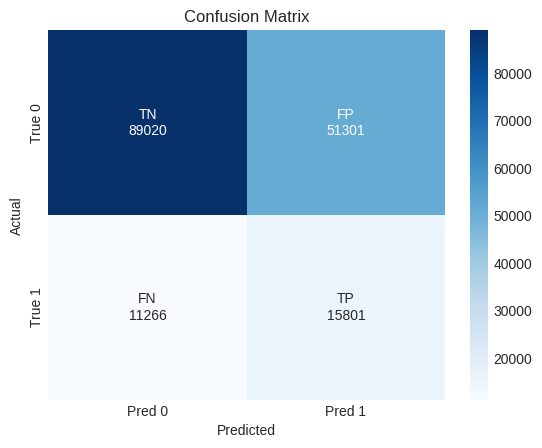

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Confusion Matrix berechnen
cm = confusion_matrix(y_eval, y_pred_tuned)

# Labels für jede Zelle
labels = np.array([['TN', 'FP'],
                   ['FN', 'TP']])

# Kombiniere Label + Wert
annot = np.empty_like(labels, dtype=object)
for i in range(2):
    for j in range(2):
        annot[i,j] = f'{labels[i,j]}\n{cm[i,j]}'

# Heatmap plotten
sns.heatmap(cm, annot=annot, fmt='', cmap='Blues', 
            xticklabels=['Pred 0', 'Pred 1'], 
            yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



### Oversampling gradient 70/30

In [44]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import HistGradientBoostingClassifier


# Oversampling: moderates Verhältnis 30% (Minority/ Majority)
smote = SMOTE(sampling_strategy=0.34, random_state=42)  # 30% der Majorität
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Vor SMOTE:")
print(y_train.value_counts())
print("\nNach SMOTE:")
print(y_train_res.value_counts())

# Train HistGradientBoostingClassifier
hgb = HistGradientBoostingClassifier(
    max_depth=8,
    learning_rate=0.03,
    max_iter=500,
    l2_regularization=0.1,
    class_weight="balanced",
    random_state=40
)

hgb.fit(X_train_res, y_train_res)

# predict serious cases 
y_prob = hgb.predict_proba(X_eval)[:, 1]

# Threshold-Tuning
thresholds = np.arange(0.01, 1.0, 0.001)
results = []

for t in thresholds:
    y_pred = (y_prob >= t).astype(int)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_eval, y_pred, pos_label=1, average='binary', zero_division=0
    )
    results.append((t, precision, recall, f1))

best_threshold = max(results, key=lambda x: x[3])[0]
y_pred_tuned = (y_prob >= best_threshold).astype(int)

# Evaluation
print("=== Tuned HistGradientBoosting Report ===")
print(classification_report(y_eval, y_pred_tuned))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_eval, y_pred_tuned))
print("Score:", roc_auc_score(y_eval, y_prob))

Vor SMOTE:
Accident_Severity
0    561282
1    108268
Name: count, dtype: int64

Nach SMOTE:
Accident_Severity
0    561282
1    190835
Name: count, dtype: int64
=== Tuned HistGradientBoosting Report ===
              precision    recall  f1-score   support

           0       0.89      0.65      0.75    140321
           1       0.24      0.56      0.33     27067

    accuracy                           0.64    167388
   macro avg       0.56      0.61      0.54    167388
weighted avg       0.78      0.64      0.68    167388

=== Confusion Matrix ===
[[91058 49263]
 [11789 15278]]
Score: 0.6364408741034855


### Undersampling Gradient 70/30

In [45]:
import pandas as pd
from sklearn.ensemble import HistGradientBoostingClassifier

from sklearn.utils import resample

# 1. Trainingsdaten in Klassen aufteilen
df_train = X_train.copy()
df_train['target'] = y_train

# Mehrheit- und Minderklasse
df_majority = df_train[df_train['target'] == 0]  # z. B. Klasse 0
df_minority = df_train[df_train['target'] == 1]  # z. B. Klasse 1

# 2. Unter-sample die Mehrheitklasse auf 70% der Originalgröße
df_majority_downsampled = resample(
    df_majority,
    replace=False,        # ohne Zurücklegen
    n_samples=int(len(df_majority) * 0.6),  # 
    random_state=42
)

# 3. Kombiniere wieder die Trainingsdaten
df_train_balanced = pd.concat([df_majority_downsampled, df_minority])

# 4. Features & Target zurücktrennen
X_train_balanced = df_train_balanced.drop('target', axis=1)
y_train_balanced = df_train_balanced['target']

# Train HistGradientBoostingClassifier
hgb = HistGradientBoostingClassifier(
    max_depth=8,
    learning_rate=0.03,
    max_iter=500,
    l2_regularization=0.1,
    class_weight="balanced",
    random_state=40
)

hgb.fit(X_train_balanced, y_train_balanced)

# 2. Wahrscheinlichkeiten auf Eval-Daten
y_prob = hgb.predict_proba(X_eval)[:, 1]  # Wahrscheinlichkeit für Klasse 1

# 3. Threshold-Tuning
import numpy as np
from sklearn.metrics import precision_recall_fscore_support, classification_report, confusion_matrix, roc_auc_score

thresholds = np.arange(0.01, 1.0, 0.001)
results = []

for t in thresholds:
    y_pred = (y_prob >= t).astype(int)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_eval, y_pred, pos_label=1, average='binary', zero_division=0
    )
    results.append((t, precision, recall, f1))

best = max(results, key=lambda x: x[3])  # bestes F1
best_threshold = best[0]
print(f"Best Threshold (max F1): {best_threshold:.2f}")

# 4. Vorhersagen mit optimalem Threshold
y_pred_tuned = (y_prob >= best_threshold).astype(int)

# 5. Evaluation
print("=== Tuned HistGradientBoosting Report ===")
print(classification_report(y_eval, y_pred_tuned))
print("=== Confusion Matrix ===")
cm = confusion_matrix(y_eval, y_pred_tuned)
print(cm)
print("Score (ROC-AUC):", roc_auc_score(y_eval, y_prob))


Best Threshold (max F1): 0.50
=== Tuned HistGradientBoosting Report ===
              precision    recall  f1-score   support

           0       0.89      0.61      0.72    140321
           1       0.23      0.61      0.34     27067

    accuracy                           0.61    167388
   macro avg       0.56      0.61      0.53    167388
weighted avg       0.78      0.61      0.66    167388

=== Confusion Matrix ===
[[85027 55294]
 [10478 16589]]
Score (ROC-AUC): 0.6387249107089369


                                              Feature  Importance
2                                  Number_of_Vehicles    0.058653
0                                         Speed_limit    0.017824
26                          Urban_or_Rural_Area_Rural    0.016248
3                                                Hour    0.004638
1                                  Weekday_or_Weekend    0.001947
21                        Road_Surface_Conditions_Dry    0.000750
25                Road_Surface_Conditions_Wet or damp    0.000748
6               Weather_Conditions_Fine no high winds    0.000673
19                          Light_Conditions_Daylight    0.000610
17            Light_Conditions_Darkness - no lighting    0.000577
15             Light_Conditions_Darkness - lights lit    0.000565
20  Road_Surface_Conditions_Data missing or out of...    0.000472
23               Road_Surface_Conditions_Frost or ice    0.000129
28                          Urban_or_Rural_Area_Urban    0.000119
24        

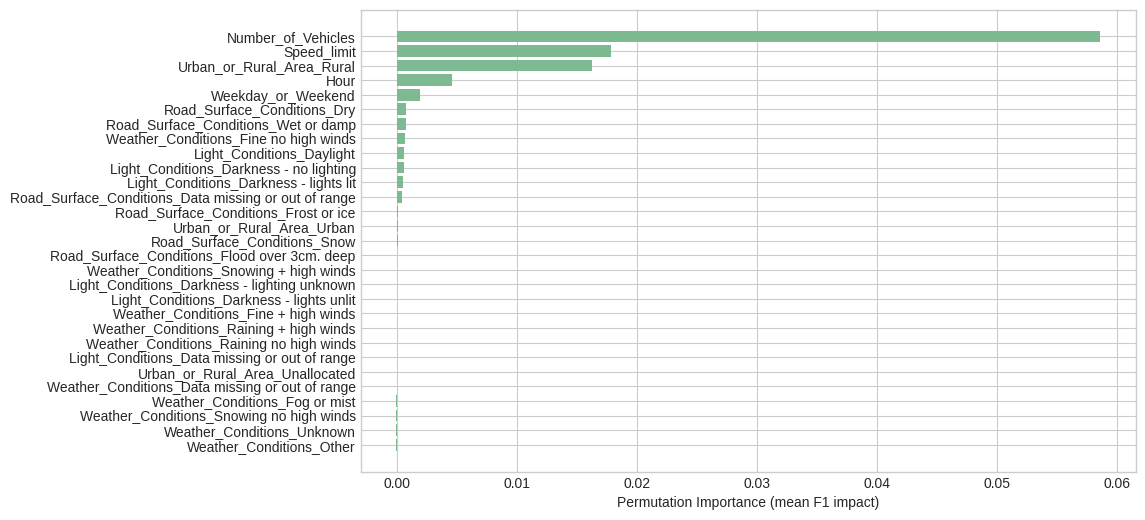

In [38]:
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt

# Permutation Importance auf Eval-Daten
result = permutation_importance(hgb, X_eval, y_eval, n_repeats=10, random_state=42, scoring='f1')

# In DataFrame
perm_importances = pd.DataFrame({
    'Feature': X_eval.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)

print(perm_importances)

# Plot
plt.figure(figsize=(10,6))
plt.barh(perm_importances['Feature'], perm_importances['Importance'])
plt.gca().invert_yaxis()
plt.xlabel("Permutation Importance (mean F1 impact)")
plt.show()


### ANN

In [79]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# 0. Train-Set undersample
from sklearn.utils import resample

# get majority/minority classes
df_train = X_train.copy()
df_train['target'] = y_train

# majority class = 0, minority class = 1
majority = df_train[df_train['target'] == 0]
minority = df_train[df_train['target'] == 1]

# undersample majority class (z.B. 50% behalten)
majority_downsampled = resample(
    majority,
    replace=False,
    n_samples=int(len(majority)*0.8),
    random_state=42
)

df_train_balanced = pd.concat([majority_downsampled, minority])

X_train_bal = df_train_balanced.drop('target', axis=1)
y_train_bal = df_train_balanced['target']

# 1. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)
X_eval_scaled  = scaler.transform(X_eval)
X_test_scaled  = scaler.transform(X_test)

# 2. Build the ANN
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 3. Train the ANN
history = model.fit(
    X_train_scaled, y_train_bal.values,
    validation_data=(X_eval_scaled, y_eval.values),
    epochs=50,
    batch_size=256,
    verbose=1
)

# 4. Predict probabilities on Eval
y_prob = model.predict(X_eval_scaled).flatten()

# 5. Threshold-Tuning
thresholds = np.arange(0.01, 1.0, 0.01)
best_f1 = 0
best_threshold = 0.5

for t in thresholds:
    y_pred = (y_prob >= t).astype(int)
    from sklearn.metrics import f1_score
    f1 = f1_score(y_eval, y_pred)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

print(f"Best Threshold (max F1): {best_threshold:.2f}")

y_pred_tuned = (y_prob >= best_threshold).astype(int)

# 7. Evaluation
print("=== ANN Classification Report ===")
print(classification_report(y_eval, y_pred_tuned))

cm = confusion_matrix(y_eval, y_pred_tuned)
print("=== Confusion Matrix ===")
print(f"TP: {cm[1,1]} FP: {cm[0,1]} FN: {cm[1,0]} TN: {cm[0,0]}")

roc_score = roc_auc_score(y_eval, y_prob)
print("ROC-AUC Score:", roc_score)


Epoch 1/50


/home/melesse/anaconda3/lib/python3.13/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1438/1438 ━━━━━━━━━━━━━━━━━━━━ 2s 684us/step - accuracy: 0.7044 - loss: 0.5952 - val_accuracy: 0.8355 - val_loss: 0.4840
Epoch 2/50
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 1s 634us/step - accuracy: 0.7063 - loss: 0.5879 - val_accuracy: 0.8360 - val_loss: 0.4769
Epoch 3/50
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 1s 654us/step - accuracy: 0.7067 - loss: 0.5865 - val_accuracy: 0.8344 - val_loss: 0.4824
Epoch 4/50
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 1s 649us/step - accuracy: 0.7067 - loss: 0.5856 - val_accuracy: 0.8358 - val_loss: 0.4742
Epoch 5/50
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 1s 653us/step - accuracy: 0.7068 - loss: 0.5851 - val_accuracy: 0.8318 - val_loss: 0.4792
Epoch 6/50
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 1s 649us/step - accuracy: 0.7067 - loss: 0.5848 - val_accuracy: 0.8351 - val_loss: 0.4731
Epoch 7/50
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 1s 639us/step - accuracy: 0.7070 - loss: 0.5844 - val_accuracy: 0.8341 - val_loss: 0.4756
Epoch 8/50
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 1s 669us/step - accuracy: 0.7066 - loss: 0.58

1438/1438 ━━━━━━━━━━━━━━━━━━━━ 1s 646us/step - accuracy: 0.7075 - loss: 0.5824 - val_accuracy: 0.8316 - val_loss: 0.4739
5231/5231 ━━━━━━━━━━━━━━━━━━━━ 1s 161us/step
Best Threshold (max F1): 0.33
=== ANN Classification Report ===
              precision    recall  f1-score   support

           0       0.89      0.66      0.75    140321
           1       0.24      0.56      0.34     27067

    accuracy                           0.64    167388
   macro avg       0.56      0.61      0.54    167388
weighted avg       0.78      0.64      0.69    167388

=== Confusion Matrix ===
TP: 15200 FP: 48385 FN: 11867 TN: 91936
ROC-AUC Score: 0.6394878650881586


### Testset ANN

In [80]:
# --- Test Set Evaluation ANN ---
y_test_prob = model.predict(X_test_scaled).flatten()
y_test_pred = (y_test_prob >= best_threshold).astype(int)

print("=== TEST Classification Report ===")
print(classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)
print("=== TEST Confusion Matrix ===")
print(f"TP: {cm[1,1]} FP: {cm[0,1]} FN: {cm[1,0]} TN: {cm[0,0]}")

print("Test ROC-AUC:", roc_auc_score(y_test, y_test_prob))


3924/3924 ━━━━━━━━━━━━━━━━━━━━ 1s 165us/step
=== TEST Classification Report ===
              precision    recall  f1-score   support

           0       0.89      0.66      0.75    105241
           1       0.24      0.56      0.33     20300

    accuracy                           0.64    125541
   macro avg       0.56      0.61      0.54    125541
weighted avg       0.78      0.64      0.69    125541

=== TEST Confusion Matrix ===
TP: 11350 FP: 36190 FN: 8950 TN: 69051
Test ROC-AUC: 0.6377086689556033
